In [1]:
#import required libraries 
#import OpenCV library
import cv2
import numpy as np
#import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def detect_faces(f_cascade, colored_img, scaleFactor =1.1,minNeighbors=5):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors);          
 
 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)  
        # cv.Rectangle(img, pt1 = 頂點一角, pt2 = 頂點對角 , color, thickness=1, lineType=8, shift=0) 
 
 faceNum = len(faces) 
 return img_copy, faceNum

# OpenCV's CascadedClassifier 
- detectMultiScale（image，scaleFactor，minNeighbors）：這是一個檢測對象的通用函數，在這種情況下，它會檢測面，因為我們調用了face cascade。
- 如果找到一個面，它將以“Rect（x_cordinate，y_cordinate，width，height）”的形式返回所述面的位置列表
如果沒有，則返回“None”。
-----------------------------------------------------
- (1)image：第一個輸入是灰度圖像。因此，請確保圖像為灰度。 
- (2)scaleFactor：這個函數補償了當一個面看起來比另一個面更大時發生的錯誤感覺，因為它更接近相機。 
- (3)minNeighbors：這是一種使用移動窗口來檢測對象的檢測算法，它通過在聲明找到的面部之前定義在當前對象附近找到多少個對象來實現。

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 


In [4]:
#load  image 
test5 = cv2.imread('../data/test5.jpg')

In [5]:
#load 2 different cascade classifiers training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('..\\data\\haarcascade_frontalface_alt.xml')
lbp_cascade = cv2.CascadeClassifier('..\\data\\lbpcascade_frontalcatface.xml')

In [20]:
for i in [ 1.1 , 1.2 , 1.3 , 1.4 , 1.5 ]:
    for neighbor in range(1,10):
        faces_detected_img ,facenum = detect_faces(haar_face_cascade, test5,scaleFactor =i,
                                           minNeighbors = neighbor)  
        print(f'scaleFactor= {i} & minNeighbors ={neighbor} >>> face detected = {facenum}')

scaleFactor= 1.1 & minNeighbors =1 >>> face detected = 10
scaleFactor= 1.1 & minNeighbors =2 >>> face detected = 6
scaleFactor= 1.1 & minNeighbors =3 >>> face detected = 5
scaleFactor= 1.1 & minNeighbors =4 >>> face detected = 5
scaleFactor= 1.1 & minNeighbors =5 >>> face detected = 4
scaleFactor= 1.1 & minNeighbors =6 >>> face detected = 4
scaleFactor= 1.1 & minNeighbors =7 >>> face detected = 4
scaleFactor= 1.1 & minNeighbors =8 >>> face detected = 4
scaleFactor= 1.1 & minNeighbors =9 >>> face detected = 3
scaleFactor= 1.2 & minNeighbors =1 >>> face detected = 6
scaleFactor= 1.2 & minNeighbors =2 >>> face detected = 5
scaleFactor= 1.2 & minNeighbors =3 >>> face detected = 5
scaleFactor= 1.2 & minNeighbors =4 >>> face detected = 3
scaleFactor= 1.2 & minNeighbors =5 >>> face detected = 3
scaleFactor= 1.2 & minNeighbors =6 >>> face detected = 3
scaleFactor= 1.2 & minNeighbors =7 >>> face detected = 3
scaleFactor= 1.2 & minNeighbors =8 >>> face detected = 3
scaleFactor= 1.2 & minNeighbor

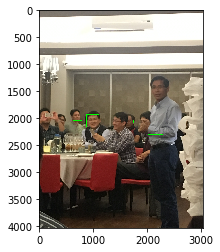

In [25]:
best_detect_img_01 , n_faces_01 = detect_faces(haar_face_cascade, test5,scaleFactor =1.3, minNeighbors = 1)
plt.imshow( convertToRGB(best_detect_img_01) )

In [22]:
for i in [ 1.1 , 1.2 , 1.3 , 1.4 , 1.5 ]:
    for neighbor in range(1,10):
        faces_detected_img ,facenum = detect_faces(lbp_cascade, test5,scaleFactor =i,
                                           minNeighbors = neighbor)  
        print(f'scaleFactor= {i} & minNeighbors ={neighbor} >>> face detected = {facenum}')

scaleFactor= 1.1 & minNeighbors =1 >>> face detected = 28
scaleFactor= 1.1 & minNeighbors =2 >>> face detected = 5
scaleFactor= 1.1 & minNeighbors =3 >>> face detected = 1
scaleFactor= 1.1 & minNeighbors =4 >>> face detected = 1
scaleFactor= 1.1 & minNeighbors =5 >>> face detected = 0
scaleFactor= 1.1 & minNeighbors =6 >>> face detected = 0
scaleFactor= 1.1 & minNeighbors =7 >>> face detected = 0
scaleFactor= 1.1 & minNeighbors =8 >>> face detected = 0
scaleFactor= 1.1 & minNeighbors =9 >>> face detected = 0
scaleFactor= 1.2 & minNeighbors =1 >>> face detected = 10
scaleFactor= 1.2 & minNeighbors =2 >>> face detected = 0
scaleFactor= 1.2 & minNeighbors =3 >>> face detected = 0
scaleFactor= 1.2 & minNeighbors =4 >>> face detected = 0
scaleFactor= 1.2 & minNeighbors =5 >>> face detected = 0
scaleFactor= 1.2 & minNeighbors =6 >>> face detected = 0
scaleFactor= 1.2 & minNeighbors =7 >>> face detected = 0
scaleFactor= 1.2 & minNeighbors =8 >>> face detected = 0
scaleFactor= 1.2 & minNeighbo

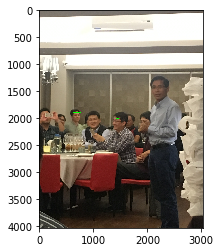

In [26]:
best_detect_img_02 , n_faces_02 = detect_faces(lbp_cascade, test5,scaleFactor =1.3, minNeighbors = 1)
plt.imshow( convertToRGB(best_detect_img_02) )